# SysML v2 JupyterBook

*Last update: January 23rd, 2022*

This Jupyter Notebook is an exploration of SysML v2 from the user perspective. It shows some SysML v2 basics, but mainly focuses on the special features compared to SysML v1 and how they can be used. For a detailed introduction to the textual syntax of SysML v2, I recommend the following PDF: [Introduction to the SysML v2 Language Textual Notation](https://github.com/Systems-Modeling/SysML-v2-Release/blob/master/doc/Intro%20to%20the%20SysML%20v2%20Language.pdf).

**Please note: This is work in progress. You will see sketchy stuff. If you have any comments, contact me: [tim@mbse4u.com](mailto:tim@mbse4u.com).**

## Table of Contents

* [Introduction](#sysmlv2modintroduction)
* [Graphical and Textual Notation of SysML v2](#sysmlv2modnotation)
* [Example and first steps](#sysmlv2modexample)
* [Parts and PartDefinitions](#sysmlv2modparts)
* [Specialization and Subsetting](#sysmlv2modspecialization)
* [Putting the parts together](#sysmlv2modconnect)
* [Modeling Interfaces](#sysmlv2modinterfaces)
* [Modeling variants](#sysmlv2modvariants)
* [Modeling requirements](#sysmlv2modrequirements)


## Introduction<a name="sysmlv2modintroduction"></a>

This section provides 

* a brief introduction of the modeling with SysML v2,
* with a special focus on what is different compared to SysML v1.

The target audience for this Jupyter notebook is SysML v1 modelers. The basic concepts like "What is a Use Case?" or "What is a Part Decomposition?" are not explained.

It is not (yet) a complete SysML v2 tutorial. It uses the SysML v2 pilot implementation which is not intended as full modeling tool for industrial application. 

## Graphical and Textual Notation of SysML v2<a name="sysmlv2modnotation"></a>

SysML v1 is primarily known for its diagrams. Although they are only the visualization of the model information and the real treasure of a real SysML model is the model data behind the diagrams.

SysML v2 also provides graphical visualizations and additionally a textual notation. Both are equivalent notations and tools can provide editors for both.

The SysML v2 pilot implementation has so far only a textual editor and generates the graphical notation. Therefore, some have been under the impression that SysML v2 is primarily textual. This is not the case. Those who wish can use SysML v2 as they would SysML v1 and edit the model using graphical editors only.

## Example and first steps<a name="sysmlv2modexample"></a>

The simple example system is the following electrical vehicle:

![Electrical HSUV](lego-evehicle.jpg)

Let's start with a logical architecture of the vehicle. A first major difference compared to SysML is that there is a textual syntax for SysML v2.
The following cell shows the textual SysML v2 syntax of the logical architecture. The package statement defines the namespace of the architecture. The eVehicle architecture itself is a simple set of parts.

In [1]:
package eVehicle_LogicalArchitecture {
    part eVehicle {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel[2];
        part rearWheel[2];
    }
}

Package eVehicle_LogicalArchitecture (38762aac-3544-4e04-bad2-e327772177c6)


Run the cell above to create the real model. The text above is only the textual syntax of SysML v2. The show command provides a deep insight into the model structure:

In [2]:
%show eVehicle_LogicalArchitecture

Package eVehicle_LogicalArchitecture (38762aac-3544-4e04-bad2-e327772177c6)
  [Membership] PartUsage eVehicle (4d31dd07-81a0-4fd5-85ab-55bff9dc1cd5)
    [Subsetting (implicit)] PartUsage parts (a94fa591-5608-4e25-a690-494e9889965e)
    [FeatureMembership] PartUsage body (e8cae817-f7cc-435d-a3bd-61891324bafb)
      [Subsetting (implicit)] PartUsage parts (a94fa591-5608-4e25-a690-494e9889965e)
    [FeatureMembership] PartUsage battery (efae3f3b-f0ae-47ec-b6cb-8ce7ad9b3a65)
      [Subsetting (implicit)] PartUsage parts (a94fa591-5608-4e25-a690-494e9889965e)
    [FeatureMembership] PartUsage engine (8d6ed75f-1a73-47f2-ae91-f8fb8e73bd0c)
      [Subsetting (implicit)] PartUsage parts (a94fa591-5608-4e25-a690-494e9889965e)
    [FeatureMembership] PartUsage frontAxis (c59799d3-b2f1-4387-ba91-00943df2e8ab)
      [Subsetting (implicit)] PartUsage parts (a94fa591-5608-4e25-a690-494e9889965e)
    [FeatureMembership] PartUsage rearAxis (bb1cc7af-62a3-49cf-9823-cfb3f7b72534)
      [Subsetting (impli

More convenient for the common model user, of course, is the graphical notation presented after the execution of the following cell:

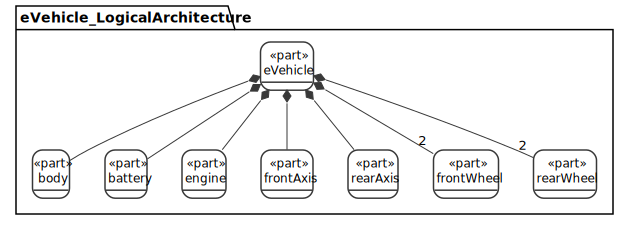

In [3]:
%viz --view=tree eVehicle_LogicalArchitecture

The diagram is only a view, and not an editor. A graphical editor is not provided in the pilot implementation. Future SysML v2 modeling tools will certainly offer graphical editors.

### Changes to SysML v1

SysML v2 is a complete new language with a different foundation than SysML v1. Therefore, there are plenty of differences. Here, I highlight only the changes that are most relevant to the modeler.

If I had modeled the eVehicle in SysML v1, I would have had to first define blocks and then part properties whose types are the blocks.

![eVehicle in SysML v1](evehicle-logical-architecture-sysmlv1.jpg)

Did you notice it in my simple SysML v2 example above? There are no blocks there, only parts. To put it simply, this would be like modeling part properties in SysML v1 without blocks. Basically, it works that in SysML v1 you define a part without a block. But what is not possible in SysML v1 is that the parts themselves define substructures.

## Parts and PartDefinitions<a name="sysmlv2modparts"></a>

Modeling a decomposition is a typical capability that an MBSE modeling language must have. We used partial decomposition in our small eVehicle example. For example, there is also the decomposition of functions.

In SysML v2, you can define parts without types, but with substructures. I extend our example and add a property to the wheel to specify the size. The type of the attribute is Integer. I skip units for now. 

In [4]:
package eVehicle_LogicalArchitecture {
    
    import ScalarValues::Integer;
    
    part eVehicle {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel[2] {
            attribute size : Integer;
        }
        part rearWheel[2] {
            attribute size : Integer;
        }
    }
}

Package eVehicle_LogicalArchitecture (dc09b226-b5d4-4a45-a233-9c74335789e8)


Run the cell with the SysML v2 model, and visualize the model. If you also would like to see the model structure, execute the %show command as described above.

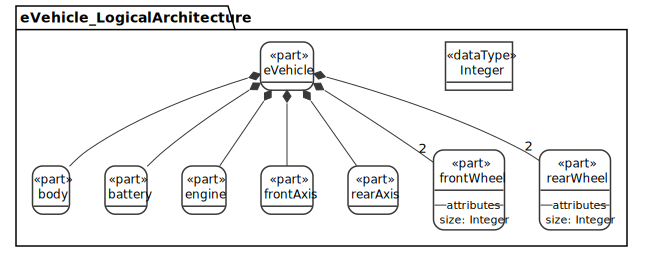

In [5]:
%viz --view=tree eVehicle_LogicalArchitecture

As in SysML v1, a part always needs a context in SysML v2. In our example, the part *eVehicle* is the context of the parts *body*, *battery*, and so forth. No context is explicitly defined for the part *eVehicle*. Then the context is implicitly the most general part definition named *Part* from the SysML v2 model library.

Although it is still very simple, the model already smells of reuse. The size attribute is currently defined twice. Now, we define a type respectively PartDefinition *Wheel* and specify that as the type of the parts. The PartDefinition can be compared to the SysML v1 Block.

In [5]:
package eVehicle_LogicalArchitecture {

    import ScalarValues::Integer;   
    
    part def Wheel {
        attribute size : Integer;
    }
   
    part eVehicle {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel : Wheel[2];
        part rearWheel : Wheel[2];
    }
}

Package eVehicle_LogicalArchitecture (3495ed67-72f7-47c2-b551-1f487c9e841c)


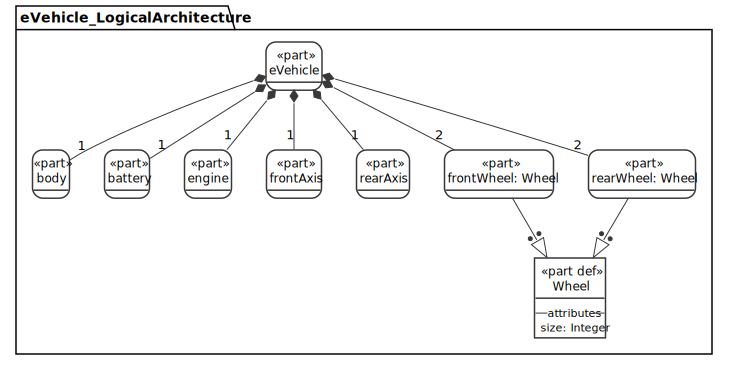

In [3]:
%viz --view=tree eVehicle_LogicalArchitecture

The attribute *size* itself can also be defined and reused for several attribute usages. It is a common concept in SysML v2 to separate the definition of elements and the usage of elements. SysML v1 also follows this concept, but not as consequent as SysML v2. 

The attribute definition is not mandatory and only partly useful in this example, because the size is only used at one place. But I added it anyhow as an example for attribute definitions. The keyword *attribute* can be omitted as, for example, in the definition of the *size* value. The AttributeDefinition can be compared to the SysML v1 ValueType.

In [7]:
package eVehicle_LogicalArchitecture {   
    
    attribute def WheelSize {
        import ScalarValues::Integer;
        size : Integer;
    }
    
    part def Wheel {
        attribute sizeOfWheel : WheelSize;
    }
    
    part eVehicle {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel : Wheel[2];
        part rearWheel : Wheel[2];
    }
}

Package eVehicle_LogicalArchitecture (9a622556-834c-47cd-a19c-856d8246560a)


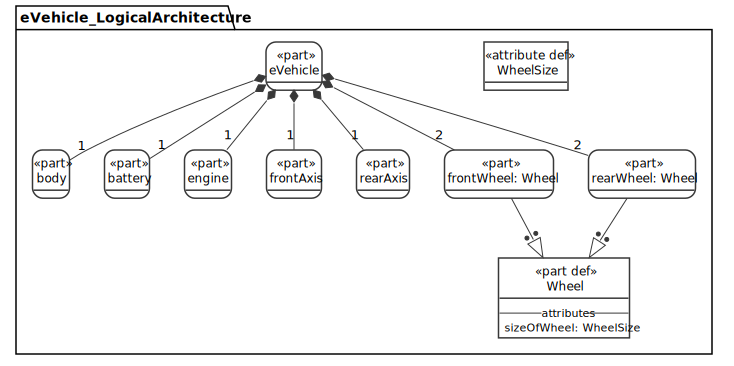

In [8]:
%viz --view=tree eVehicle_LogicalArchitecture

### When to use Parts and when to use PartDefinitions

A simple rule of thumb is: if you use a thing only once, model it as a part. If it is used multiple times or specializations of it, then model it as a part definition.

Part definition is a classification of things, and parts are usages of part definitions. If you have only one engine in the model, then you can model it directly as a part. As described above, the part still has a part definition, which in this case is implicitly the general part definition *Part* from the system library.

## Specialization and Subsetting<a name="sysmlv2modspecialization"></a>

In [9]:
package eVehicle_LogicalArchitecture {   
    
    attribute def WheelSize {
        import ScalarValues::Integer;
        size : Integer;
    }
    
    part def Wheel {
        constraint pressureConstraint : WheelPressureConstraint (
            currentPressure = currentPressure,
            limitPressure = maxPressure);
        attribute sizeOfWheel : WheelSize;
        attribute currentPressure : ScalarValues::Real;
        attribute maxPressure : ScalarValues::Real;
    }
    
    part def FrontWheel :> Wheel {
        attribute redefines maxPressure = 2.0;
    }
    part def RearWheel :> Wheel {
        attribute redefines maxPressure = 2.5;
    }
    
    constraint def WheelPressureConstraint (
        currentPressure : ScalarValues::Real,
        limitPressure : ScalarValues::Real) {
            currentPressure <= limitPressure
    }
    
    part eVehicle {
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel : FrontWheel[2];
        part frontLeftWheel :> frontWheel {
            redefines currentPressure = 1.6;
        }
        part frontRightWheel :> frontWheel {
            redefines currentPressure = 1.8;
        }

        part rearWheel : RearWheel[2];
        part rearLeftWheel :> rearWheel {
            redefines currentPressure = 2.4;
        }
        part rearRightWheel :> rearWheel {
            redefines currentPressure = 2.5;
        }
        
    }
}

Package eVehicle_LogicalArchitecture (43977942-c128-4d51-97e0-8a294ed2d2ff)


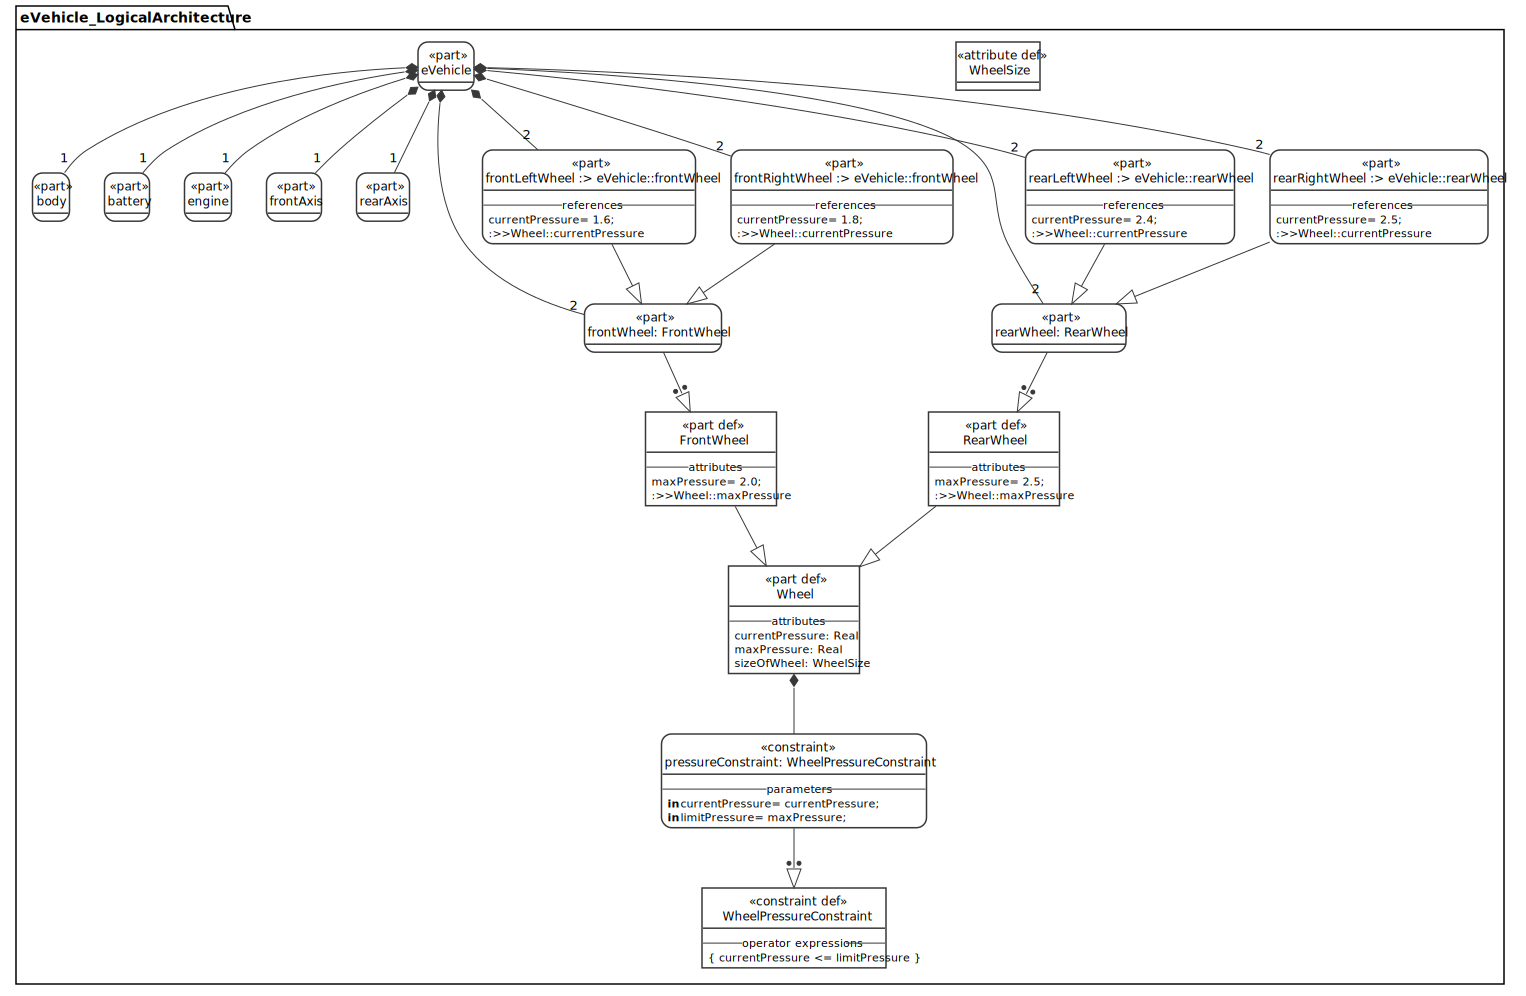

In [10]:
%viz --view=tree eVehicle_LogicalArchitecture

## Putting the parts together<a name="sysmlv2modconnect"></a>

By now the model only defines the breakdown structure of the vehicle. There is no definition yet of how the parts are connected. The next example model *eVehicle_LogicalArchitecture* connects the parts in a meaningful way.


In [11]:
package eVehicle_LogicalArchitecture {
       
    attribute def WheelSize {
        import ScalarValues::Integer;
        size : Integer;
    }
    
    part def Wheel {
        constraint pressureConstraint : WheelPressureConstraint (
            currentPressure = currentPressure,
            limitPressure = maxPressure);
        attribute sizeOfWheel : WheelSize;
        attribute currentPressure : ScalarValues::Real;
        attribute maxPressure : ScalarValues::Real;
    }
    
    part def FrontWheel :> Wheel {
        attribute redefines maxPressure = 2.0;
    }
    part def RearWheel :> Wheel {
        attribute redefines maxPressure = 2.5;
    }
    
    constraint def WheelPressureConstraint (
        currentPressure : ScalarValues::Real,
        limitPressure : ScalarValues::Real) {
            currentPressure <= limitPressure
    }

    
    part eVehicle {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel : Wheel[2];
        part rearWheel : Wheel[2];
        
        connect battery to engine;
        connect engine to frontAxis;
        connect frontAxis to frontWheel;
        connect rearAxis to rearWheel;
        connect body to battery;
        connect body to engine;
        connect body to frontAxis;
        connect body to rearAxis;
    }
}

Package eVehicle_LogicalArchitecture (162415b3-09e3-46d3-b303-e4dbe1d39c49)


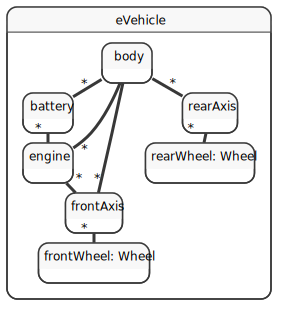

In [12]:
%viz --view=interconnection eVehicle_LogicalArchitecture::eVehicle

## Modeling interfaces<a name="sysmlv2modinterfaces"></a>

The interaction points are defined by ports in SysML v2, similar to SysML v1. The following extended example defines the interaction points between the engine and the battery. The connection is changed to connect the ports instead of the parts.

In [14]:
package eVehicle_LogicalArchitecture {
       
    attribute def WheelSize {
        import ScalarValues::Integer;
        size : Integer;
    }
    
    part def Wheel {
        constraint pressureConstraint : WheelPressureConstraint (
            currentPressure = currentPressure,
            limitPressure = maxPressure);
        attribute sizeOfWheel : WheelSize;
        attribute currentPressure : ScalarValues::Real;
        attribute maxPressure : ScalarValues::Real;
    }
    
    part def FrontWheel :> Wheel {
        attribute redefines maxPressure = 2.0;
    }
    part def RearWheel :> Wheel {
        attribute redefines maxPressure = 2.5;
    }
    
    constraint def WheelPressureConstraint (
        currentPressure : ScalarValues::Real,
        limitPressure : ScalarValues::Real) {
            currentPressure <= limitPressure
    }

    
    part eVehicle {    
        part body;
        part battery {
            port powerOut;
        }
        part engine {
            port powerIn;
        }
        part frontAxis;
        part rearAxis;
        part frontWheel : Wheel[2];
        part rearWheel : Wheel[2];
        
        connect battery.powerOut to engine.powerIn;
        connect engine to frontAxis;
        connect frontAxis to frontWheel;
        connect rearAxis to rearWheel;
        connect body to battery;
        connect body to engine;
        connect body to frontAxis;
        connect body to rearAxis;
    }
}

Package eVehicle_LogicalArchitecture (14fe61a0-e30f-4660-a8da-3e071e0f5a30)


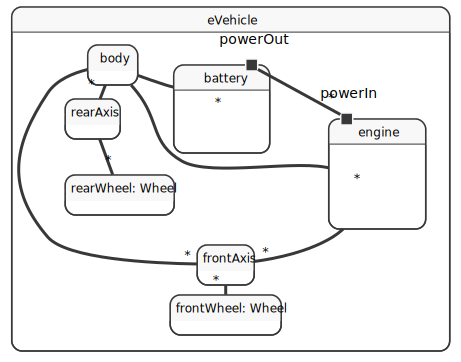

In [15]:
%viz --view=interconnection eVehicle_LogicalArchitecture::eVehicle

The ports *powerIn* and *powerOut* have no types respectively the SysML v2 library element *Port* as default type. The consistent usage/definition pattern applies here as well. The port is a usage. With a PortDef the interaction point can be defined. In this example it is a good candidate for a model library.

The port only specifies the interaction point. The interface defines the connection between interaction points. The *PowerOutPort* is conjugated for the *consumerPort* port.

In [21]:
package eVehicleLibrary {
    
    import ScalarValues::Integer;
    
    attribute def ElectricEnergy;
    attribute def BatteryCapacity;
    
    port def PowerOutPort {
        out energy : ElectricEnergy;
    }
    
    interface def PowerInterface {
        end supplierPort : PowerOutPort;
        end consumerPort : ~PowerOutPort;
    }
}

Package eVehicleLibrary (910b300c-a3f3-4321-aba8-95ff3d2409b6)


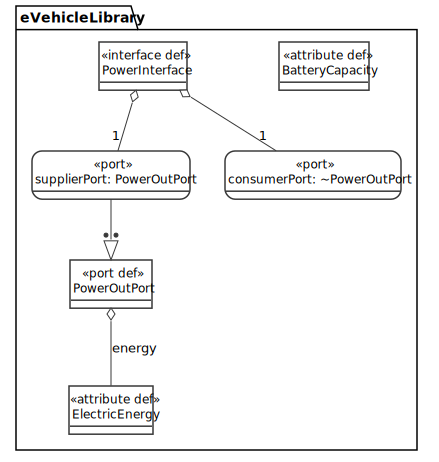

In [22]:
%viz --view=tree eVehicleLibrary

Next, the definitions of the port and the interface are applied to the model. **Do not forget to run the eVehicle_Definitions and eVehicleLibrary in section [Libraries for the eVehicle example](#sysmlv2modlibrary).**

In [23]:
package eVehicle_LogicalArchitecture {
       
    import eVehicleLibrary::*;

    attribute def WheelSize {
        import ScalarValues::Integer;
        size : Integer;
    }
    
    part def Wheel {
        constraint pressureConstraint : WheelPressureConstraint (
            currentPressure = currentPressure,
            limitPressure = maxPressure);
        attribute sizeOfWheel : WheelSize;
        attribute currentPressure : ScalarValues::Real;
        attribute maxPressure : ScalarValues::Real;
    }
    
    part def FrontWheel :> Wheel {
        attribute redefines maxPressure = 2.0;
    }
    part def RearWheel :> Wheel {
        attribute redefines maxPressure = 2.5;
    }
    
    constraint def WheelPressureConstraint (
        currentPressure : ScalarValues::Real,
        limitPressure : ScalarValues::Real) {
            currentPressure <= limitPressure
    }
    
    part eVehicle {    
        part body;
        part battery {
            attribute capacity : BatteryCapacity;
            port powerOut : PowerOutPort;
        }
        part engine {
            port powerIn : ~PowerOutPort;
        }
        part frontAxis;
        part rearAxis;
        part frontWheel : Wheel[2];
        part rearWheel : Wheel[2];
        
        interface : PowerInterface connect 
            supplierPort :> battery.powerOut to 
            consumerPort :> engine.powerIn;
        connect engine to frontAxis;
        connect frontAxis to frontWheel;
        connect rearAxis to rearWheel;
        connect body to battery;
        connect body to engine;
        connect body to frontAxis;
        connect body to rearAxis;
    }
}

Package eVehicle_LogicalArchitecture (547562f8-edce-450d-939e-3d49c8d2c305)


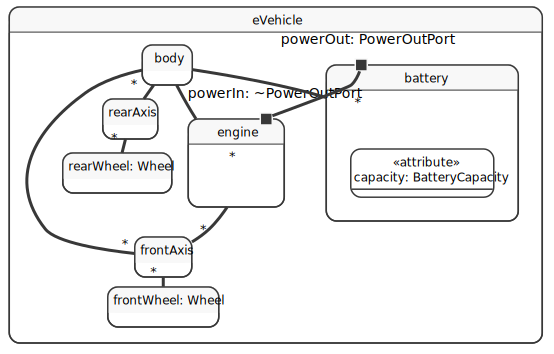

In [24]:
%viz --view=interconnection eVehicle_LogicalArchitecture::eVehicle

## Modeling variants<a name="sysmlv2modvariants"></a>

SysML v2 provides model elements for variants. This is a new feature compared to SysML v2. Following the typical approach of SysML, these are only generic concepts, but they form the foundation for tools to provide functions for them and for language extensions to be defined.

The electrical vehicle model is extended with different types of batteries and engines. First, we extend the *eVehicleDefinitions* and *eVehicleLibrary*, and define a part definition for the battery. The complete library can be found in section [Libraries for the eVehicle example](#sysmlv2modlibrary).

In [26]:
package eVehicleLibrary {
    
    import ScalarValues::Integer;
    
    attribute def ElectricEnergy;
    attribute def BatteryCapacity :> ScalarValues::Integer;
    attribute def Speed :> ScalarValues::Integer;
    
    port def PowerOutPort {
        out energy : ElectricEnergy;
    }
    
    interface def PowerInterface {
        end supplierPort : PowerOutPort;
        end consumerPort : ~PowerOutPort;
    }
}

package eVehicleDefinitions {

    import eVehicleLibrary::*;   
    
    part def Wheel {
        attribute size : Integer;
    }
    
    part def Battery {
        attribute capacity : BatteryCapacity;
    }
    
    part def Engine;
}

Package eVehicleLibrary (1be0cd26-0da3-4c9b-b195-bb92089a3e5f)
Package eVehicleDefinitions (78c97ebb-b73f-4fcb-9058-8cc8b08be9e3)


The new part definition of the *Battery* is now used in the eVehicle architecture.

In [29]:
package eVehicle_LogicalArchitecture {
    
    import eVehicleDefinitions::*;
    import eVehicleLibrary::*;
    
    part eVehicle {    
        attribute maxSpeed : Speed = 142;
        part body;
        part battery : Battery {
            attribute redefines capacity = 42;
            port powerOut : PowerOutPort;
        }
        part engine : Engine {
            port powerIn : ~PowerOutPort;
        }
        part frontAxis;
        part rearAxis;
        part frontWheel : Wheel[2];
        part rearWheel : Wheel[2];
        
        interface : PowerInterface connect 
            supplierPort :> battery.powerOut to 
            consumerPort :> engine.powerIn;
        connect engine to frontAxis;
        connect frontAxis to frontWheel;
        connect rearAxis to rearWheel;
        connect body to battery;
        connect body to engine;
        connect body to frontAxis;
        connect body to rearAxis;
    }
}

Package eVehicle_LogicalArchitecture (591229ba-dd7d-40df-a3f6-9dd404c8b299)


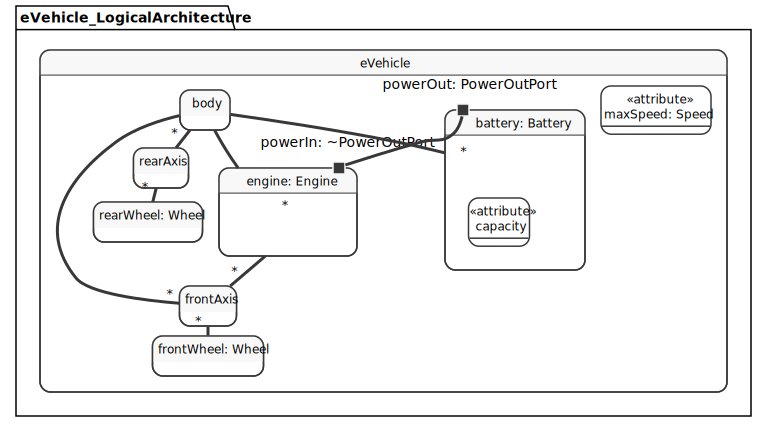

In [30]:
%viz eVehicle_LogicalArchitecture

Now, the model is prepared to add variability. We define two battery kinds with different capacities, and two engine kinds.

In [31]:
package eVehicle_VariantModel {
    
    import eVehicle_LogicalArchitecture::*;
    
    
    package eVehicle_Configurations {

        import eVehicle_Variations::*;
        
        part eVehicleStandard :> eVehicleVariations {
            part redefines engine = standardEngine;
            part redefines battery = batteryLow;
        }
        part eVehiclePremium :> eVehicleVariations {
            part redefines engine = powerEngine;
            part redefines battery = batteryHigh;
        }
        part INVALIDeVehicle :> eVehicleVariations {
            part redefines engine = powerEngine;
            part redefines battery = batteryLow;
        }
    }
    
    package eVehicle_Variations {
        
        import eVehicle_Variants::*;
        
        abstract part eVehicleVariations :> eVehicle {
        
            variation part redefines battery : Battery {
                variant part batterLow;
                variant part batteryHigh;  
            }
            variation part redefines engine : Engine {
                variant part standardEngine;
                variant part powerEngine;
            }
        
            abstract constraint { (battery == batteryLow & engine == standardEngine) ^ (battery == batteryHigh) }
        }
    }   
    
    package eVehicle_Variants {
        
        part batteryLow : Battery {
            attribute redefines capacity = 40;
        }
        part batteryHigh : Battery {
            attribute redefines capacity = 40;
        }
    
        part powerEngine : Engine;
        part standardEngine : Engine;
    }
}

Package eVehicle_VariantModel (cd002469-2f0d-4cc2-adbc-0bbd1777b74c)


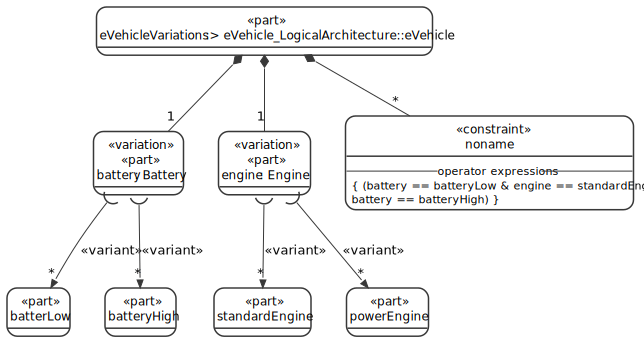

In [32]:
%viz --view=tree eVehicle_VariantModel::eVehicle_Variations::eVehicleVariations

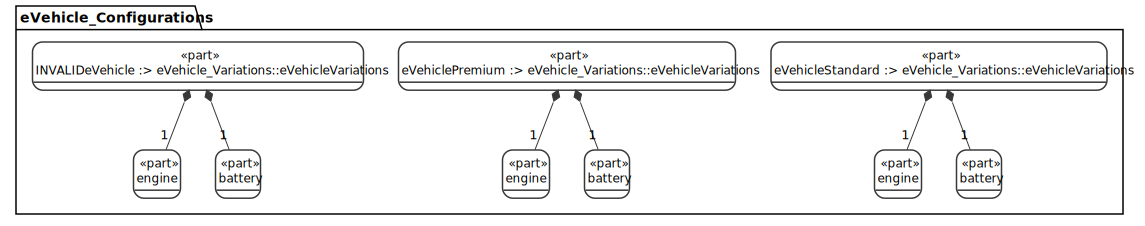

In [33]:
%viz --view=tree eVehicle_VariantModel::eVehicle_Configurations

### Avoiding the "variability model explosion"

When modeling variability with SysML v1, the model can easily explode, i.e., a small variability can lead to the need to model many model elements. I change a bit the structure of the vehicle, for example, I define the wheels as parts of the axis. I also remove the part definition Wheel and define a some lug bolts of the wheels. Finally, we have a deep nested structure: eVehicle owns axis owns wheel owns lug bolt.

In [34]:
 package eVehicle_LogicalArchitecture_ExplosionExample {
    
    import eVehicleDefinitions::*;
    import eVehicleLibrary::*;
    
    part eVehicle {    
        part engine : Engine;

        part frontAxis {
            part frontWheel[2] {
                part lugBolt[6];
                part boltCircle;
                connect boltCircle to lugBolt;
            }
            part housing;            
            connect housing to frontWheel;
        }
        
        part rearAxis {
            part rearWheel[2] {
                part lugBolt[6];
                part boltCircle;
                connect boltCircle to lugBolt;
            }
            part housing;            
            connect housing to rearWheel;
        }       
        connect engine to frontAxis;
    }
}

Package eVehicle_LogicalArchitecture_ExplosionExample (d59f792c-15fb-4c0b-9f30-adf481130530)


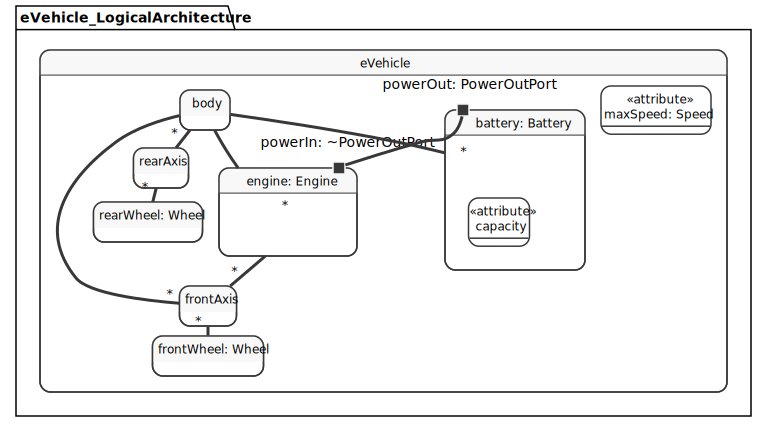

In [35]:
%viz --view=interconnection eVehicle_LogicalArchitecture

The structure *eVehicle/axis/wheel/lugBolt* can easily be modeled with SysML v1. It is slightly different in that in SysML v1 we have to use types, i.e. blocks, and cannot model parts directly.

![SysML v1 eVehicle Model](sysmlv1-variability-example-core.jpg)

Now, if we introduce variants of lug bolts, this variance ripples up through the entire structure:

![SysML v1 eVehicle Model - Variability explosion](sysmlv1-variability-example-explosion.jpg)

In SysML v2 it looks like this:

In [36]:
package eVehicleVariants_ExplosionExample {
    part lugBolt42;
    part lugBolt23;
}

package eVehicle_LogicalArchitecture_ExplosionExample {
    
    import eVehicleDefinitions::*;
    import eVehicleLibrary::*;
    import eVehicleVariants_ExplosionExample::*;
        
    part eVehicle {    
        part engine : Engine;

        part frontAxis {
            part frontWheel[2] {
                /*-----------------------------
                 * Definition of the variation
                 * ----------------------------*/
                variation part lugBolt[6] {
                    variant part lugBolt23;
                    variant part lugBolt42;  
                }
                part boltCircle;
                connect boltCircle to lugBolt;
            }
            part housing;            
            connect housing to frontWheel;
        }
        
        part rearAxis {
            part rearWheel[2] {
                part lugBolt[6];
                part boltCircle;
                connect boltCircle to lugBolt;
            }
            part housing;    
            connect housing to rearWheel;
        }        
        connect engine to frontAxis;
    }
}

Package eVehicleVariants_ExplosionExample (398e4b3e-766d-4327-85fe-c768be4ae916)
Package eVehicle_LogicalArchitecture_ExplosionExample (1c170a2f-78bb-4d6a-837e-4022a5a3ac88)


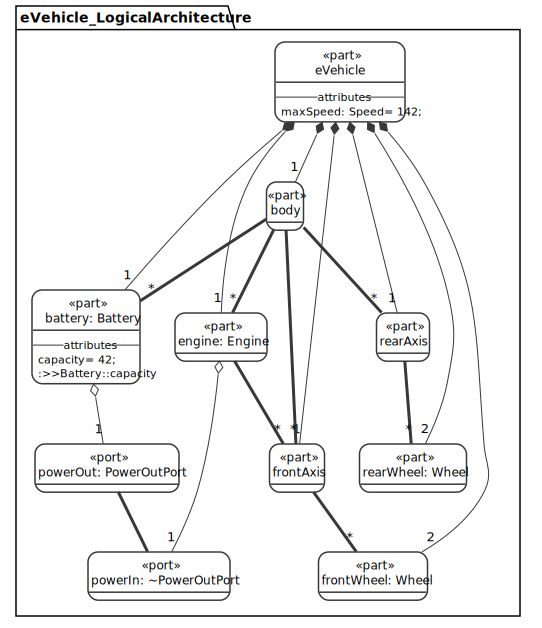

In [37]:
%viz --view=tree eVehicle_LogicalArchitecture

A concrete variant configuration of the eVehicle with lug bolts *42* can be simply created by specialization:

In [39]:
package eVehicle_Edition42 {
    
    import eVehicle_LogicalArchitecture_ExplosionExample::*;
           
    part eVehicle42 :> eVehicle {
       part redefines lugBolt42 = frontAxis.frontWheel.lugBolt;
    }
}
    

Package eVehicle_Edition42 (6de46b63-3790-49ee-9f58-5373dfcb207f)


## Modeling requirements<a name="sysmlv2modrequirements"></a>

A requirement definition is a special kind of a constraint definition including parameters and required constraints. 

**Do not forget to run the eVehicle_Definitions and eVehicleLibrary in section [Libraries for the eVehicle example](#sysmlv2modlibrary).**

In [46]:
package eVehicleRequirementDefinitions {
    
    import eVehicleDefinitions::*;
    
    requirement def BatteryCapacityReqDef {
        doc /* The actual battery capacity shall be greater than or equal
             * to the required capacity. */

            attribute capacityActual : BatteryCapacity;
            attribute capacityRequired : BatteryCapacity;
        
            require constraint{ capacityActual <= capacityRequired }
    }
    
    requirement def MaxSpeedReqDef {
        doc /* The maximum speed of the vehicle shall be 
             * not greater than the required maximum speed. */
            
            attribute maxSpeedVehicle : Speed;
            attribute maxSpeedRequired : Speed;
        
            require constraint{ maxSpeedVehicle <= maxSpeedRequired }
    }
    
}

Package eVehicleRequirementDefinitions (378bf51a-1f8a-4d86-aade-9a08dae0bd8c)


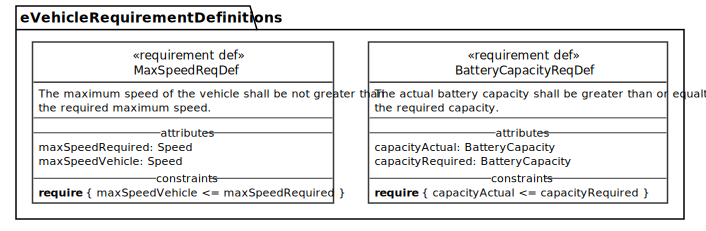

In [70]:
%viz eVehicleRequirementDefinitions

The definition of a requirement provides a reusable structure. Next, the requirement definition *BatteryCapacityRequirementDef* is used to specify a concrete requirement for the *eVehicle*. The requirement *REQ.B.1* redefines the requirement attribute *capacityRequired* with a concrete value.

It is possible to define requirement groups to manage a large set of requirements by defining that a requirement requires other requirements.

**Do not forget to run the eVehicle_VariantModel above before you run this model.**

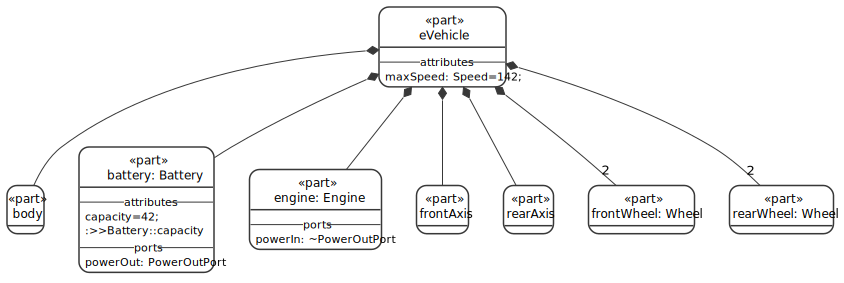

In [71]:
%viz eVehicle_LogicalArchitecture::eVehicle

In [51]:
package eVehicleRequirements {
    
    import eVehicleRequirementDefinitions::*;
    import eVehicle_LogicalArchitecture::*;
    
    requirement eVehicleSpecification {
        doc /* Requirement Specification of the eVehicle  */
        subject eVehicle :>> eVehicle;
        require eVehicleBatteryCapacity;
        require eVehicleMaxSpeed;
    }
    
    requirement <'REQ.B.1'> eVehicleBatteryCapacity : BatteryCapacityReqDef {
        subject eVehicle :>> eVehicle;
        attribute :>> capacityRequired = 50;
        attribute :>> capacityActual = eVehicle.battery.capacity;
    }
    
    requirement <'REQ.V.1'> eVehicleMaxSpeed : MaxSpeedReqDef {
        subject eVehicle :>> eVehicle;
        attribute :>> maxSpeedRequired = 140;
        attribute :>> maxSpeedVehicle = eVehicle.maxSpeed;
    }
}

Package eVehicleRequirements (1e03b0c3-fcc0-4231-9f8a-56277566d7b8)


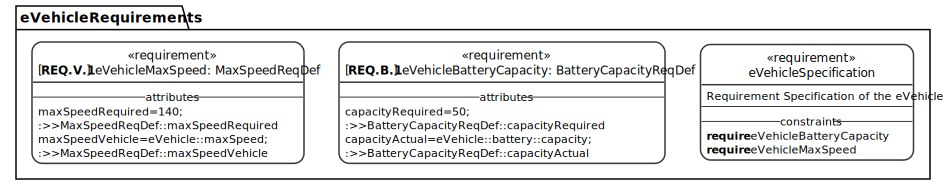

In [73]:
%viz eVehicleRequirements

Finally, we model that the eVehicle satisfies the requirement.

In [52]:
package eVehicle_LogicalArchitecture {
    
    import eVehicleLibrary::*;
    import eVehicleRequirements::*;

    
    
    attribute def WheelSize {
        import ScalarValues::Integer;
        size : Integer;
    }
    
    part def Wheel {
        constraint pressureConstraint : WheelPressureConstraint (
            currentPressure = currentPressure,
            limitPressure = maxPressure);
        attribute sizeOfWheel : WheelSize;
        attribute currentPressure : ScalarValues::Real;
        attribute maxPressure : ScalarValues::Real;
    }
    
    part def FrontWheel :> Wheel {
        attribute redefines maxPressure = 2.0;
    }
    part def RearWheel :> Wheel {
        attribute redefines maxPressure = 2.5;
    }
    
    constraint def WheelPressureConstraint (
        currentPressure : ScalarValues::Real,
        limitPressure : ScalarValues::Real) {
            currentPressure <= limitPressure
    }
    
    part eVehicleContext {
    
       part eVehicle {    
          attribute maxSpeed :Speed = 142;
          part body;
          part battery : Battery {
              attribute redefines capacity = 42;
              port powerOut : PowerOutPort;
          }
          part engine : Engine {
              port powerIn : ~PowerOutPort;
          }
          part frontAxis;
          part rearAxis;
          part frontWheel : Wheel[2];
          part rearWheel : Wheel[2];
        
          interface : PowerInterface connect 
            supplierPort :> battery.powerOut to 
            consumerPort :> engine.powerIn;
          connect engine to frontAxis;
          connect frontAxis to frontWheel;
          connect rearAxis to rearWheel;
          connect body to battery;
          connect body to engine;
          connect body to frontAxis;
          connect body to rearAxis;
      }
      satisfy eVehicleSpecification by eVehicle;
    }
}

Package eVehicle_LogicalArchitecture (7b175f1c-f510-45ca-a44d-c7dba8a5ed02)
